# Logistic Regression

n →number of features

m →number of training examples

X →input data matrix of shape (m x n)

y →true/ target value (can be 0 or 1 only)

x(i), y(i)→ith training example

w → weights (parameters) of shape (n x 1)

b →bias (parameter), a real number that can be broadcasted.

y_hat(y with a cap/hat)→ hypothesis (outputs values between 0 and 1)

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [ ]:
def gradients(X, y, y_hat):

    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    # X "numpy matrix" data: X @ (y_hat - y)

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))


    return dw, db

In [ ]:
def plot_decision_boundary(X, w, b):

    # X --> Inputs
    # w --> weights
    # b --> bias

    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m * x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-3, 3])
    plt.ylim([-1, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [ ]:
def normalize(X):

    # X --> Input.

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

In [ ]:
def predict(X):

    # X --> Input.

    # Normalizing the inputs.
    x = normalize(X)

    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)

    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]

    return np.array(pred_class)

In [ ]:
def train(X, y, bs, epochs, lr):

    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    # Initializing weights and bias to zeros.
    w = np.ones((n,1))
    b = 1

    # Reshaping y.
    y = y.reshape(m,1)

    # Normalizing the inputs.
    x = normalize(X)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

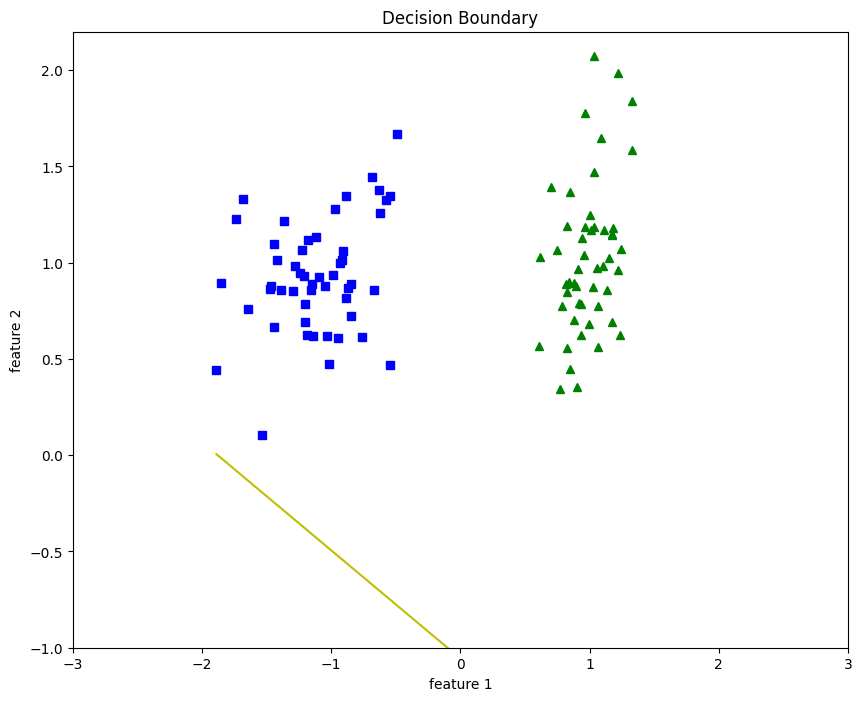

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1)
# Training
w, b, l = train(X, y, bs=10, epochs=10, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [ ]:
accuracy(y, predict(X))

0.5

0.79

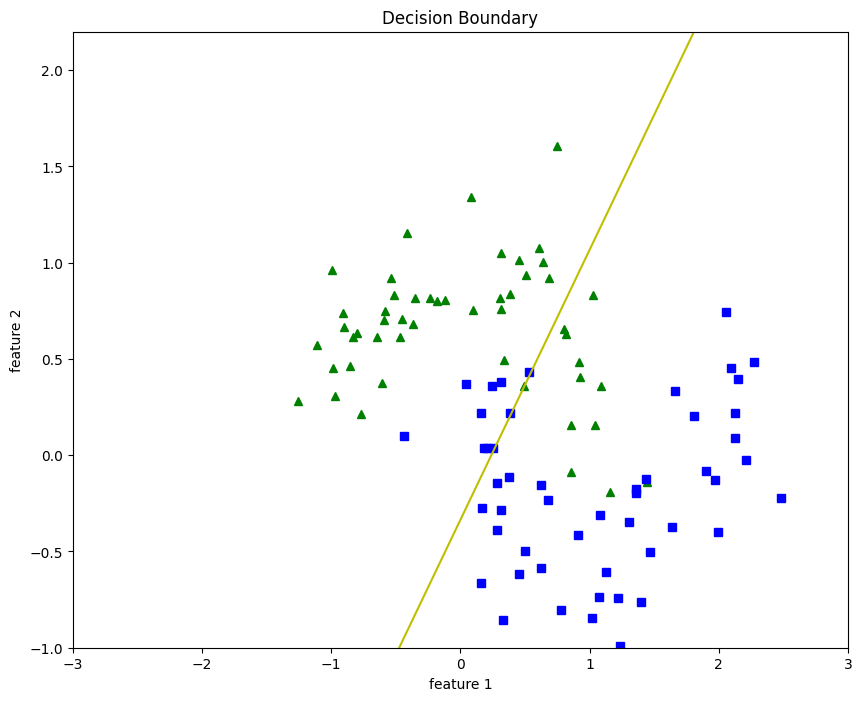

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

# Training
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)
accuracy(y, predict(X))
